<h2 style="color: rgb(29, 200, 20)">Sentiment Analysis</h2>

In [1]:
print("Hello world")

Hello world


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('IMDB-Dataset/dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<h3 style="color: rgb(100, 200, 120)">Data preparation</h3>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
reviews_df = pd.read_csv('IMDB-Dataset/dataset.csv')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    reviews_df['review'], 
    reviews_df['sentiment'], 
    test_size=0.2, 
    random_state=42
)

<h4 style="color: rgb(100, 250, 130)">Text Preprocessing</h4>

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert text to numerical features
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

<h4 style="color: rgb(100, 255, 80)">Model Training</h4>

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = classifier.predict(X_test_vectorized)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8448

Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.85      0.84      4961
    positive       0.85      0.84      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



<h4 style="color: rgb(70, 230, 100)">Model Evaluation & Training </h4>

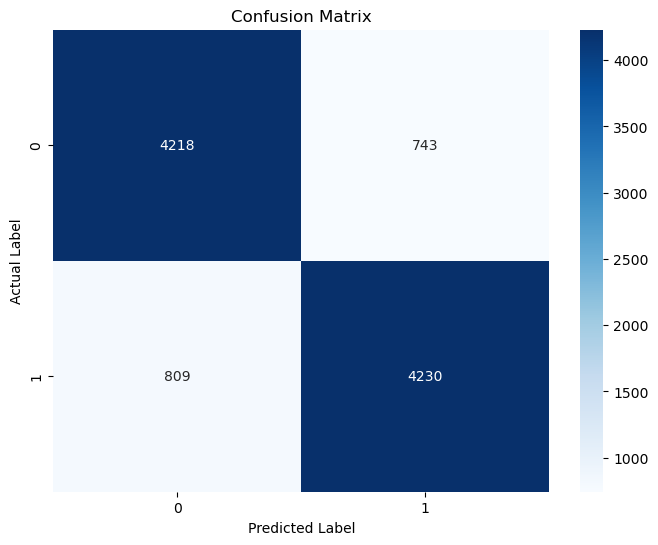

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

<h4 style="color: rgb(70, 240, 140)">Interactive Prediction Function</h4>

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# 1. Train a model (example)
# X_train = ["great movie", "terrible acting", "loved it", "hated the plot"]
# y_train = [1, 0, 1, 0]  # 1=Positive, 0=Negative

# Create a pipeline with vectorizer and classifier
model = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression()
)
model.fit(X_train, y_train)

# 2. Extract the vectorizer and classifier from the pipeline
vectorizer = model.named_steps['tfidfvectorizer']
classifier = model.named_steps['logisticregression']

# 3. Define the prediction function (your original code)
def predict_sentiment(review_text, vectorizer, classifier):
    if not isinstance(review_text, str) or len(review_text.strip()) == 0:
        raise ValueError("Input must be a non-empty string.")
    
    vectorized_review = vectorizer.transform([review_text])
    prediction = classifier.predict(vectorized_review)
    sentiment = classifier.classes_[prediction[0]]
    
    if hasattr(classifier, "predict_proba"):
        probability = classifier.predict_proba(vectorized_review)
        confidence = probability[0, prediction[0]] * 100
    else:
        confidence = None
    
    print(f"Sentiment: {sentiment}")
    if confidence is not None:
        print(f"Confidence: {confidence:.2f}%")
    else:
        print("Confidence score unavailable.")

# 4. Test the function
predict_sentiment("This movie was amazing!", vectorizer, classifier)
predict_sentiment("Worst film ever.", vectorizer, classifier)

c:\Users\Godwin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices